


# **Transformations - Translations and Rotations**

In this lesson we'll learn to:
1. Perform Image Translations
2. Rotations with getRotationMatrix2D
3. Rotations with Transpose
4. Flipping Images

- OpenCV provides two transformation functions, **cv.warpAffine** and **cv.warpPerspective**, with which you can perform all kinds of transformations. cv.warpAffine takes a **2x3 transformation matrix** while cv.warpPerspective takes a **3x3 transformation matrix** as input.

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    h,w = image.shape[0], image.shape[1]
    aspect_ratio = h/w
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2024-03-26 06:58:52--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.142.70, 3.5.244.200, 3.5.245.154, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.142.70|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-03-26 06:58:53 ERROR 403: Forbidden.

unzip:  cannot find or open images.zip, images.zip.zip or images.zip.ZIP.


### **Scaling**
- Scaling is just resizing of the image. OpenCV comes with a function **cv.resize()** for this purpose.
- The size of the image can be specified manually, or you can specify the scaling factor.
- Different interpolation methods are used. Preferable interpolation methods are **cv.INTER_AREA for shrinking** and **cv.INTER_CUBIC (slow) & cv.INTER_LINEAR for zooming**.
- By default, the interpolation method **cv.INTER_LINEAR** is used for all resizing purposes. You can resize an input image with either of following methods:

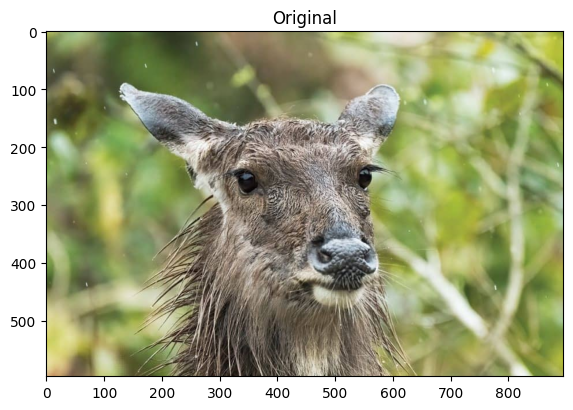

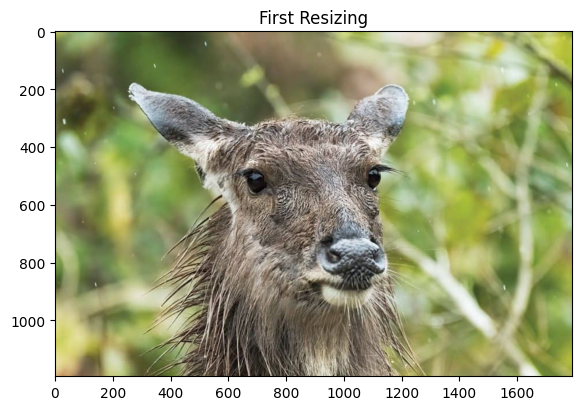

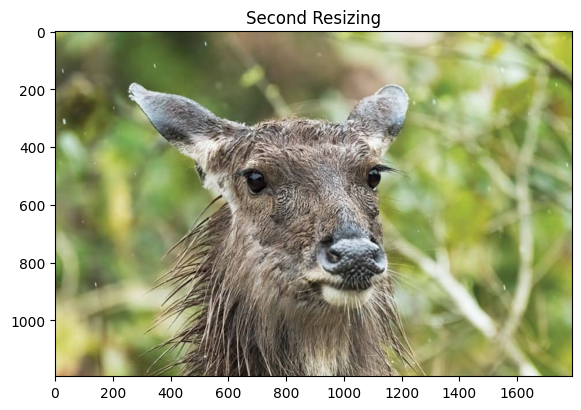

In [2]:
# Load our image
image = cv2.imread('/content/image3.jpg')
imshow("Original", image)
res = cv2.resize(image,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
imshow('First Resizing',res)
#OR
height, width = image.shape[:2]
res = cv2.resize(image,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
imshow('Second Resizing', res)

### **Translations**

This an affine transform that simply shifts the position of an image. (left or right).

We use cv2.warpAffine to implement these transformations.

```cv2.warpAffine(image, T, (width, height))```

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/warp.png)

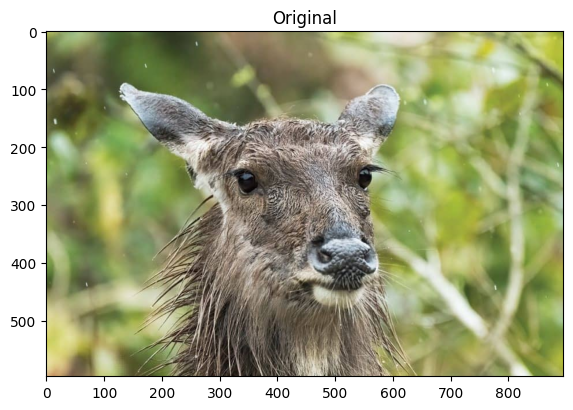

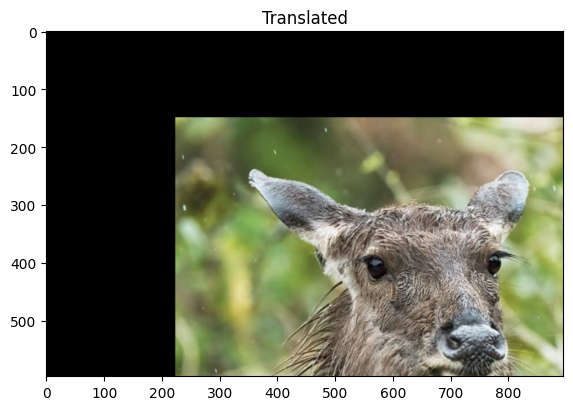

In [3]:
# Load our image
image = cv2.imread('/content/image3.jpg')
imshow("Original", image)

# Store height and width of the image
height, width = image.shape[:2]

# We shift it by quarter of the height and width
quarter_height, quarter_width = height/4, width/4

# Our Translation
#       | 1 0 Tx |
#  T  = | 0 1 Ty |

# T is our translation matrix
T = np.array([[1, 0, quarter_width], [0, 1,quarter_height]])

# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
imshow("Translated", img_translation)

In [4]:
# What does T look like
print(T)

print(height, width )

[[  1.     0.   223.75]
 [  0.     1.   149.25]]
597 895


### **Rotations**

```cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)```

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/rotation.png)


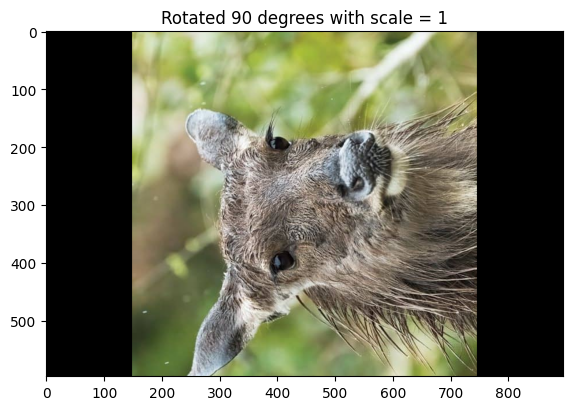

In [5]:
# Load our image
image = cv2.imread('/content/image3.jpg')
height, width = image.shape[:2]

# Divide by two to rotate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)

# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 1", rotated_image)

[[ 3.061617e-17  5.000000e-01  2.982500e+02]
 [-5.000000e-01  3.061617e-17  5.222500e+02]]


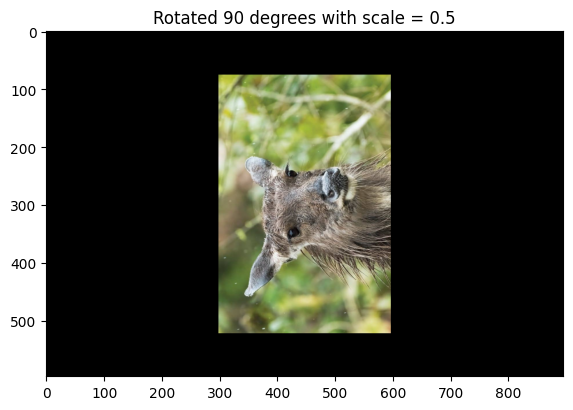

In [6]:
# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
print(rotation_matrix)
# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 0.5", rotated_image)

Notice all the black space surrounding the image.

We could now crop the image as we can calculate it's new size (we haven't learned cropping yet!).

### **Rotations with cv2.transpose** (less flexible)




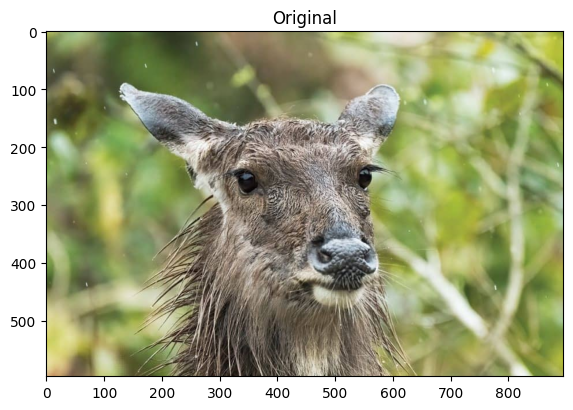

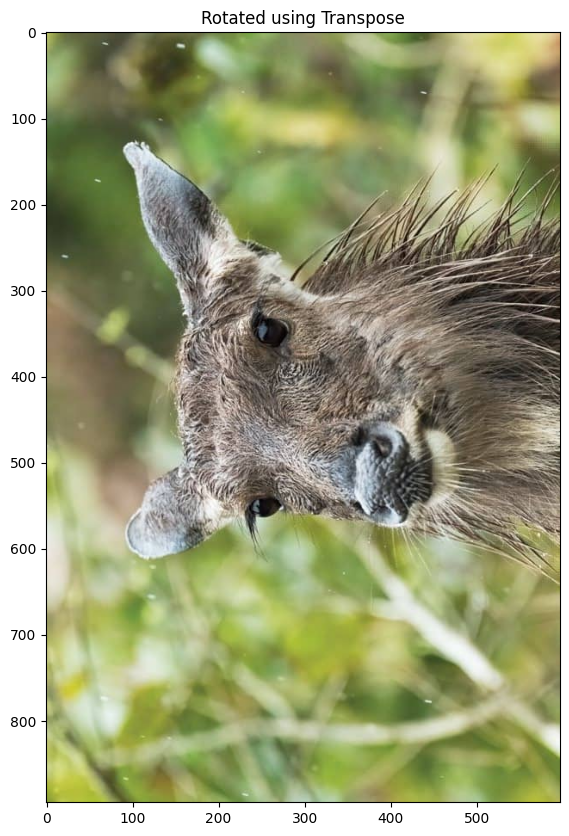

In [7]:
rotated_image = cv2.transpose(image)
imshow("Original", image)
imshow("Rotated using Transpose", rotated_image)

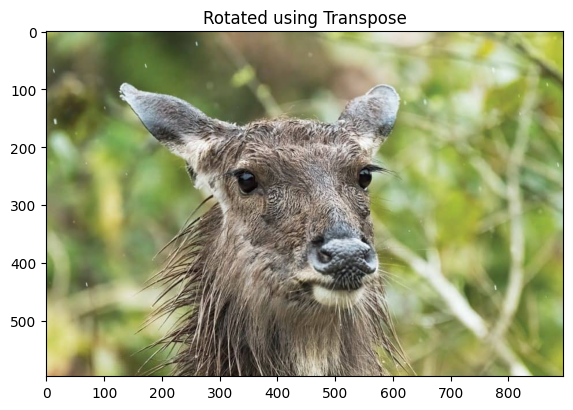

In [8]:
rotated_image = cv2.transpose(image)
rotated_image = cv2.transpose(rotated_image)

imshow("Rotated using Transpose", rotated_image)

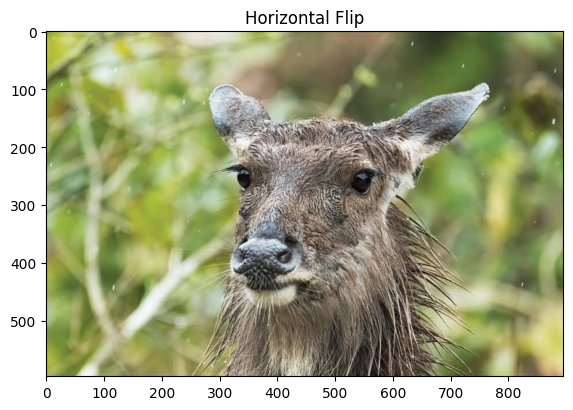

In [9]:
# Let's now to a horizontal flip.
flipped = cv2.flip(image, 1)
imshow("Horizontal Flip", flipped)

### **Affine Transformation**
- In affine transformation, all parallel lines in the original image will still be parallel in the output image.
- To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image. Then **cv2.getAffineTransform** will create a 2x3 matrix which is to be passed to cv2.warpAffine.

Check the below example, and also look at the points I selected (which are marked in green color):

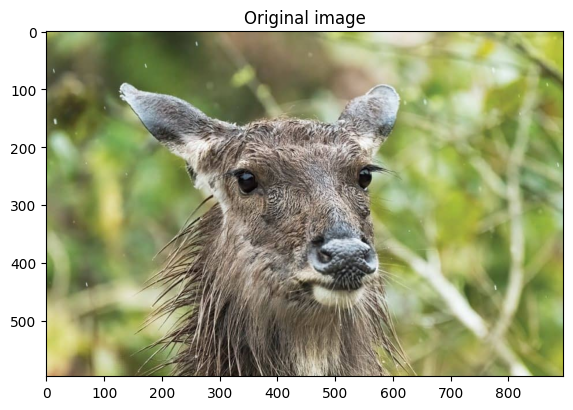

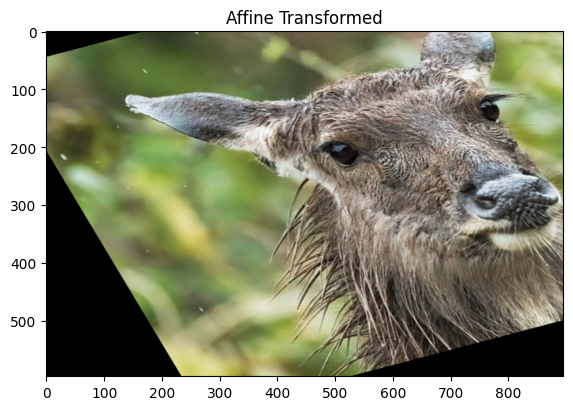

In [10]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(image,M,(width,height))
imshow('Original image',image)
imshow('Affine Transformed',dst)

### **Perspective Transformation**
- For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation.
- To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear.
- Then the transformation matrix can be found by the function **cv2.getPerspectiveTransform**. Then apply **cv2.warpPerspective** with this 3x3 transformation matrix.

See the code below:

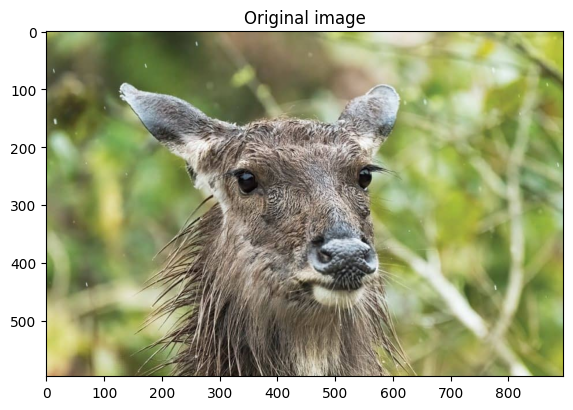

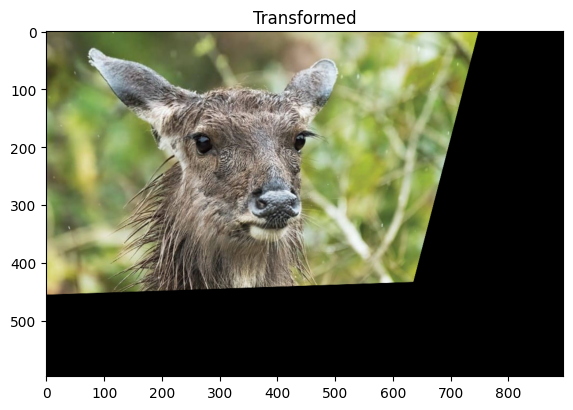

In [11]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(image,M,(width,height))

imshow('Original image',image)
imshow('Transformed',dst)

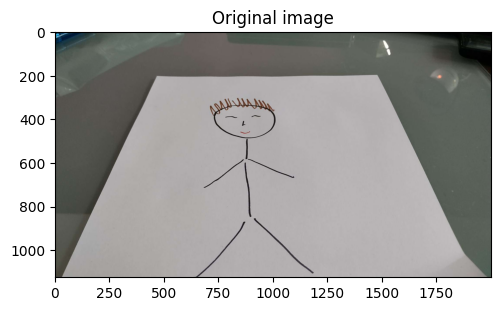

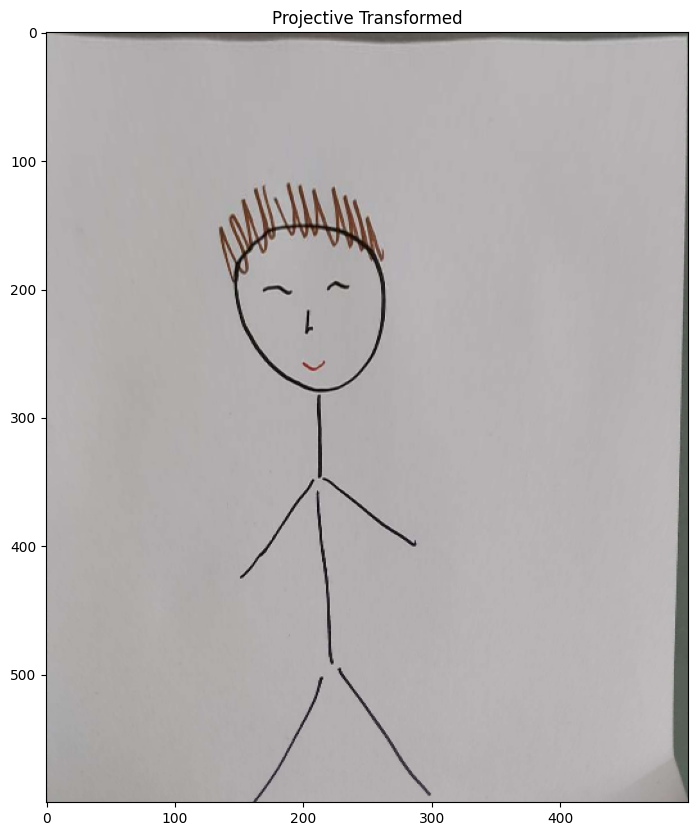

In [ ]:
img = cv2.imread("/content/5.1. Perspective.JPEG")
pts1 = np.float32([[470, 206], [1479, 198], [32, 1122], [1980, 1125]])
pts2 = np.float32([[0, 0], [500, 0], [0, 600], [500, 600]])

matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(img, matrix, (500,600))
imshow('Original image',img)
imshow('Projective Transformed',result)
